<a href="https://colab.research.google.com/github/elichen/aoc2024/blob/main/Day_14_Restroom_Redoubt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
input = """p=0,4 v=3,-3
p=6,3 v=-1,-3
p=10,3 v=-1,2
p=2,0 v=2,-1
p=0,0 v=1,3
p=3,0 v=-2,-2
p=7,6 v=-1,-3
p=3,0 v=-1,-2
p=9,3 v=2,3
p=7,3 v=-1,2
p=2,4 v=2,-3
p=9,5 v=-3,-3"""

In [5]:
input = open("input.txt").read().rstrip()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

def parse_bots(input_str: str, width: int, height: int) -> tuple[np.ndarray, list[list[tuple[int, int]]]]:
    bots = []

    # Parse input
    for line in input_str.split('\n'):
        p_str, v_str = line.split()
        px, py = [int(x) for x in p_str[2:].split(',')]
        vx, vy = [int(x) for x in v_str[2:].split(',')]
        bots.append([(px, py), (vx, vy)])

    return bots

def simulate_bots(bots: list[list[tuple[int, int]]], width: int, height: int, steps: int) -> np.ndarray:
    # Create new empty grid
    grid = np.zeros((height, width), dtype=int)

    # Calculate final position for each bot
    for bot in bots:
        pos, vel = bot
        # Calculate total movement
        total_x = (vel[0] * steps)
        total_y = (vel[1] * steps)

        # Calculate final position with wrapping
        new_x = (pos[0] + total_x) % width
        new_y = (pos[1] + total_y) % height

        # Update grid count
        grid[new_y, new_x] += 1

    return grid

def print_map(map_grid: list[list[int]]) -> None:
    for row in map_grid:
        # Replace 0 with '.' and other numbers with their value
        print(''.join('.' if cell == 0 else str(cell) for cell in row))

w,h = 101, 103
bots = parse_bots(input, w,h)
result = simulate_bots(bots, w,h, 100)

In [8]:
def count_quadrants(map_grid: list[list[int]]) -> list[int]:
    height = len(map_grid)
    width = len(map_grid[0])
    mid_y = height // 2
    mid_x = width // 2

    quadrants = [0] * 4  # [top-right, top-left, bottom-left, bottom-right]

    for y in range(height):
        for x in range(width):
            # Skip if no bots or if on middle lines
            if map_grid[y][x] == 0 or x == mid_x or y == mid_y:
                continue

            bots = map_grid[y][x]

            # Top right
            if x > mid_x and y < mid_y:
                quadrants[0] += bots
            # Top left
            elif x < mid_x and y < mid_y:
                quadrants[1] += bots
            # Bottom left
            elif x < mid_x and y > mid_y:
                quadrants[2] += bots
            # Bottom right
            elif x > mid_x and y > mid_y:
                quadrants[3] += bots

    return quadrants

quadrant_counts = count_quadrants(result)

In [9]:
from math import prod
prod(quadrant_counts)

224438715

  0%|          | 0/100 [00:00<?, ?it/s]

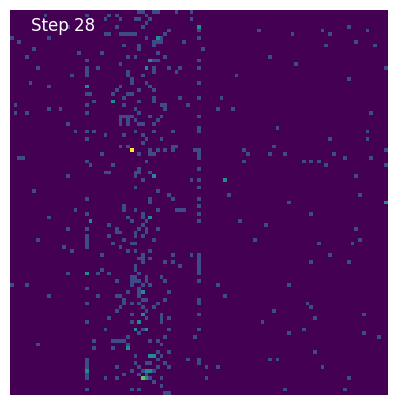

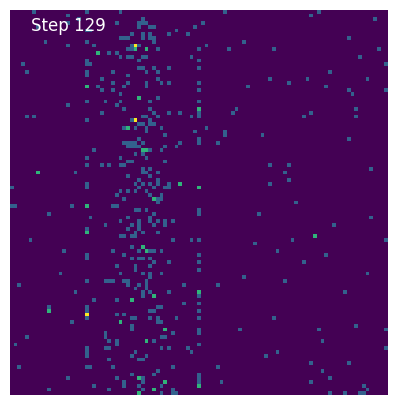

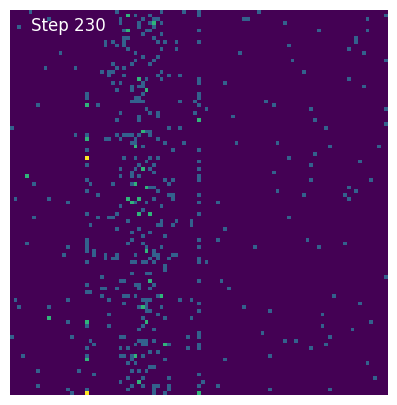

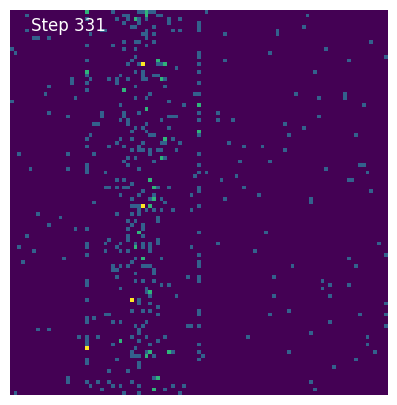

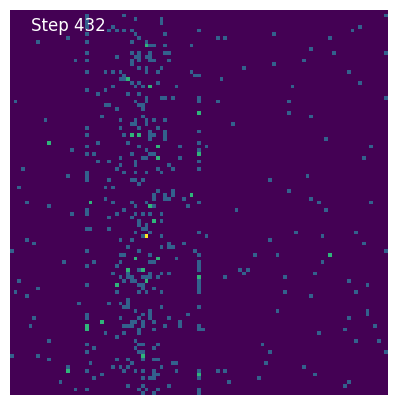

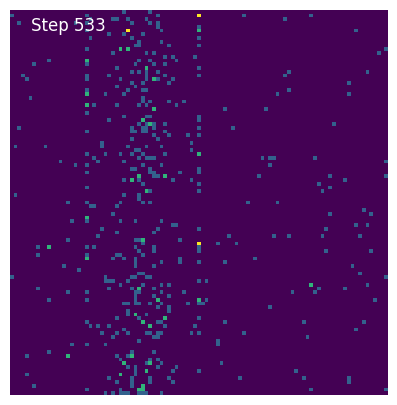

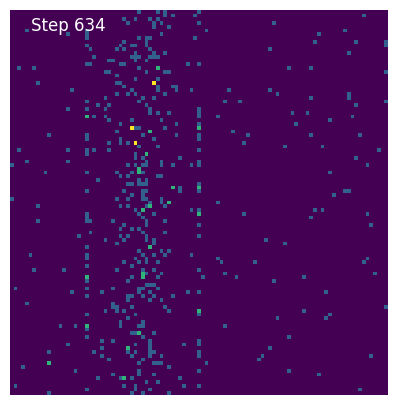

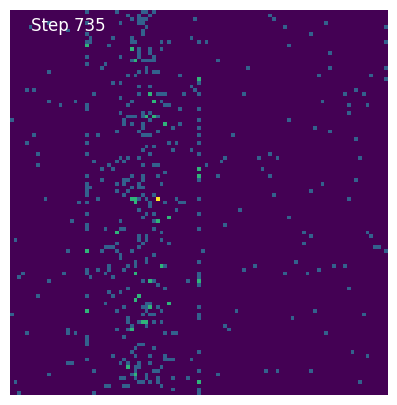

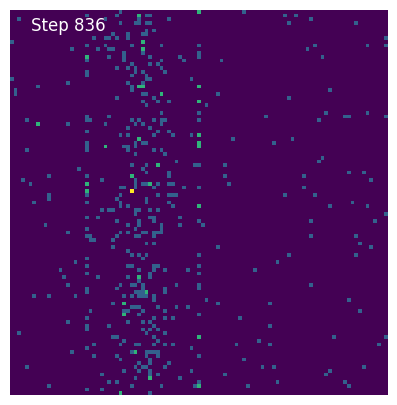

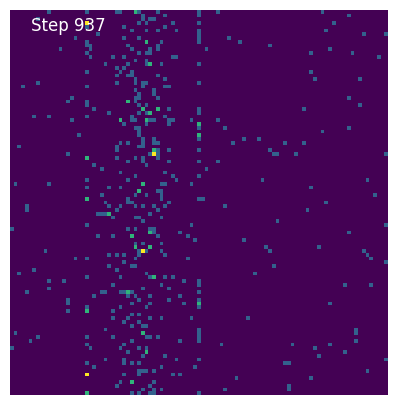

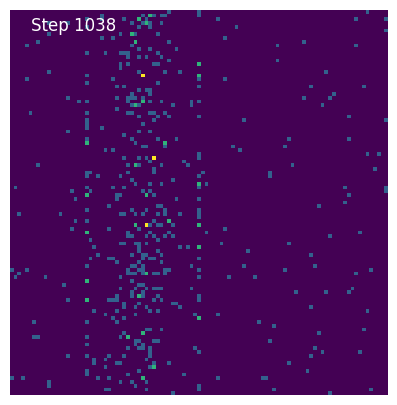

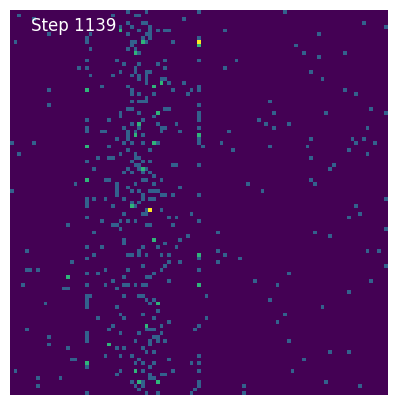

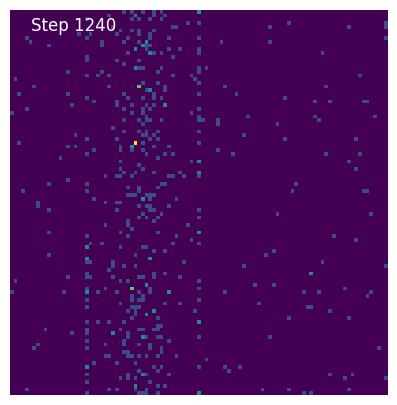

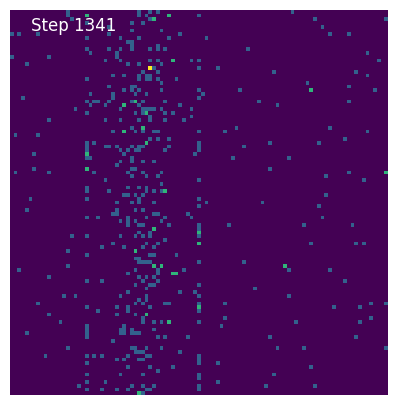

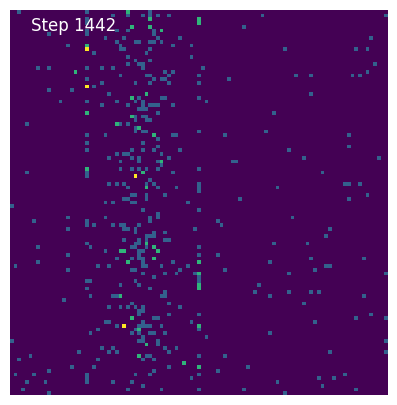

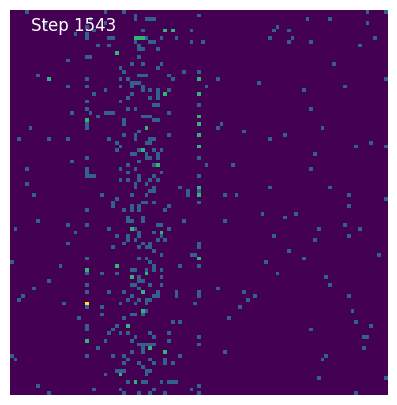

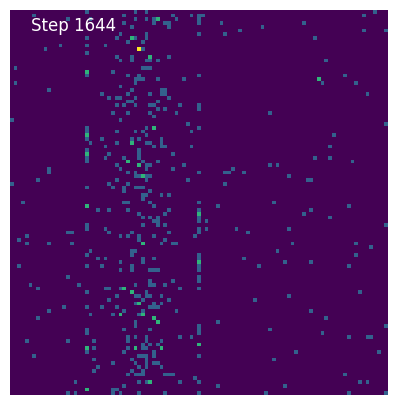

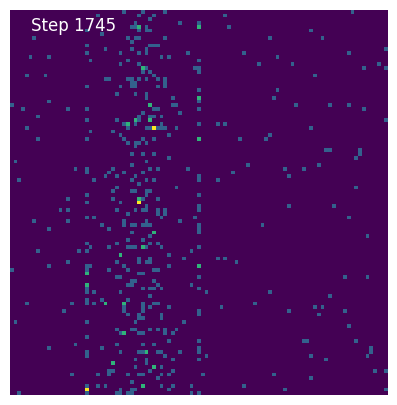

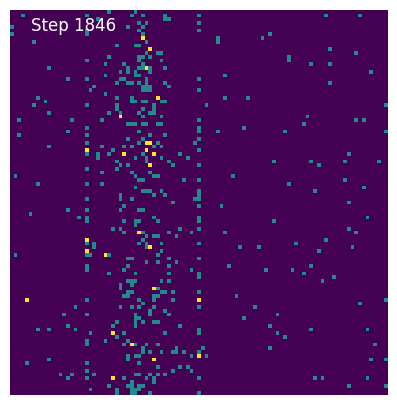

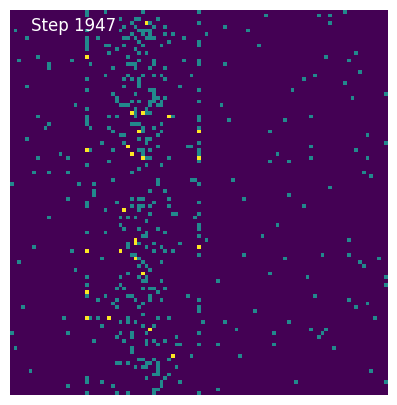

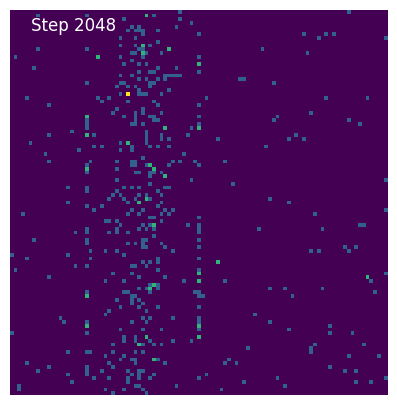

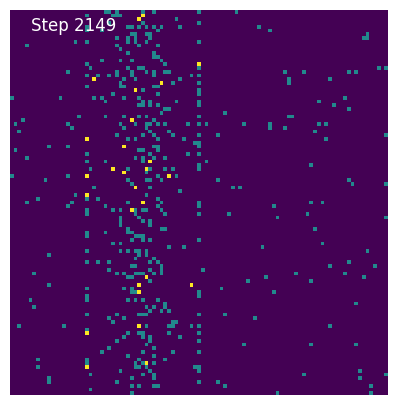

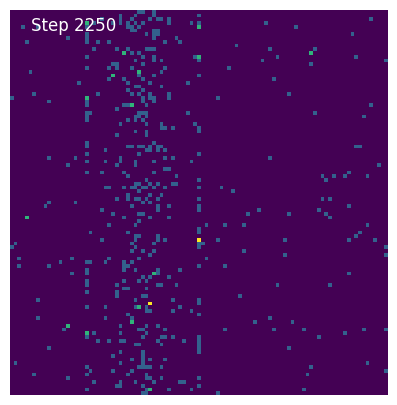

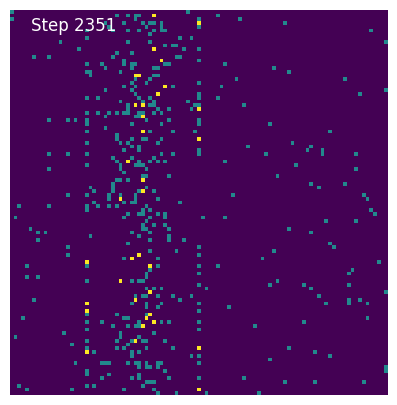

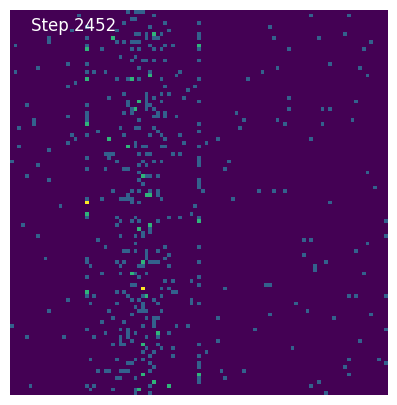

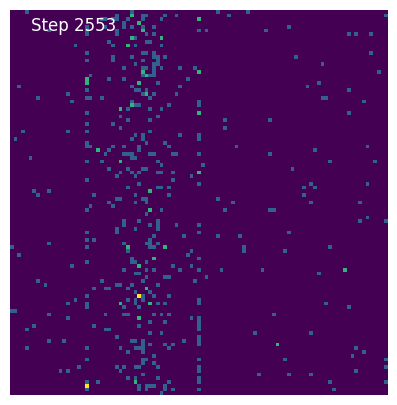

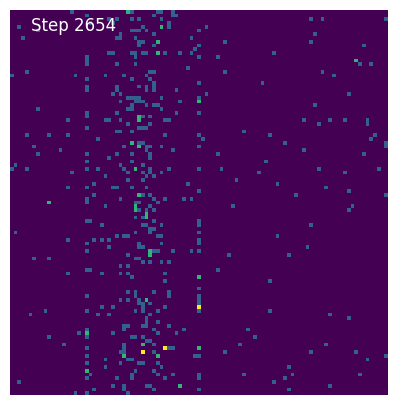

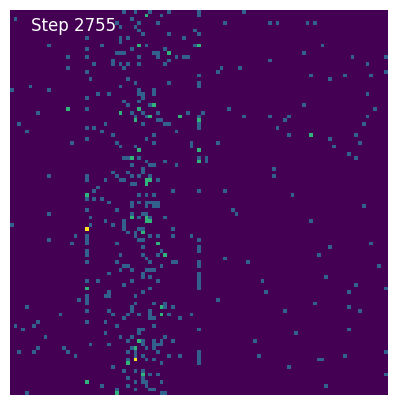

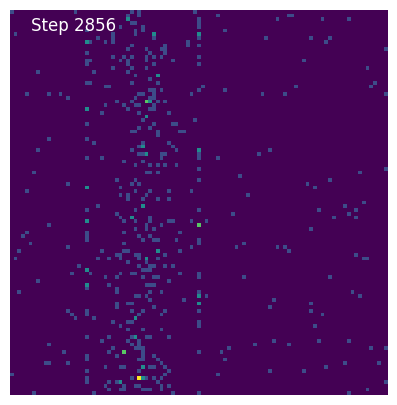

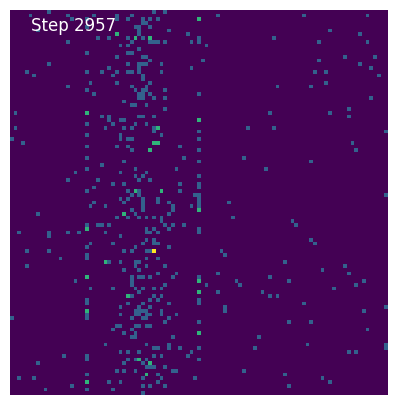

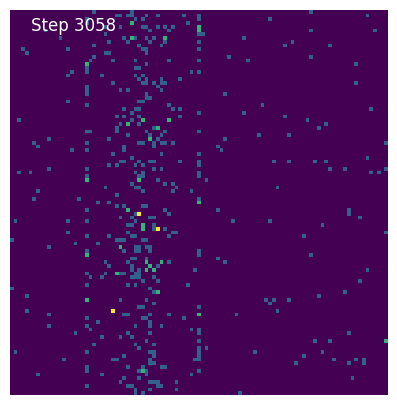

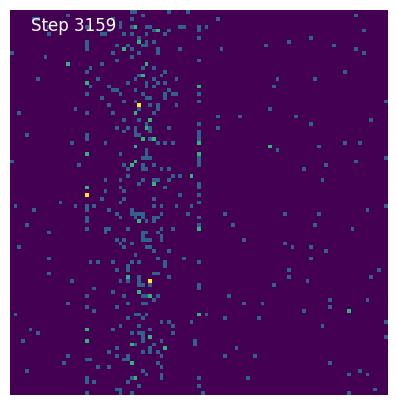

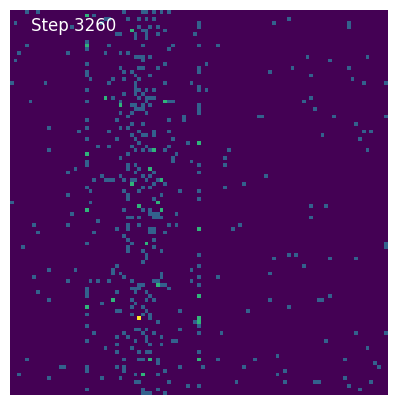

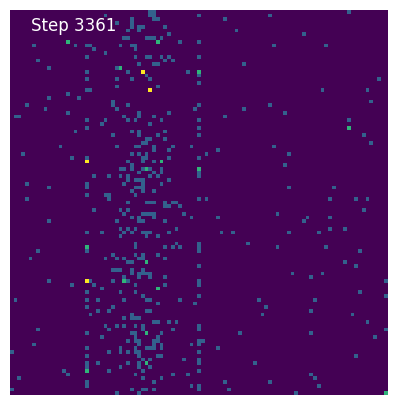

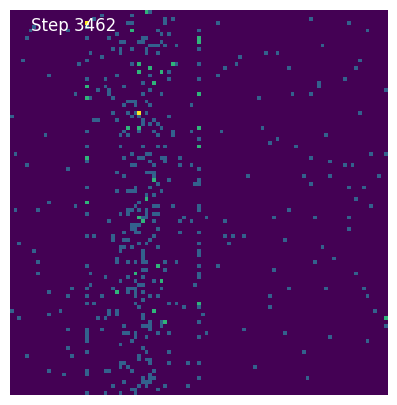

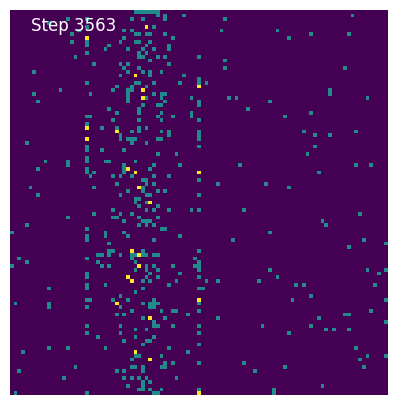

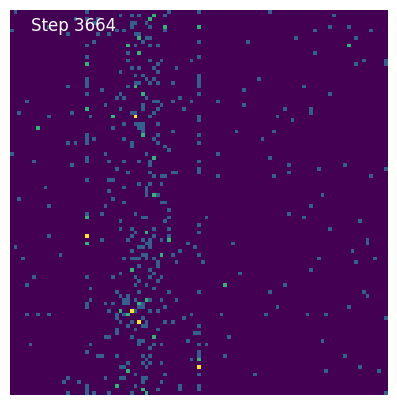

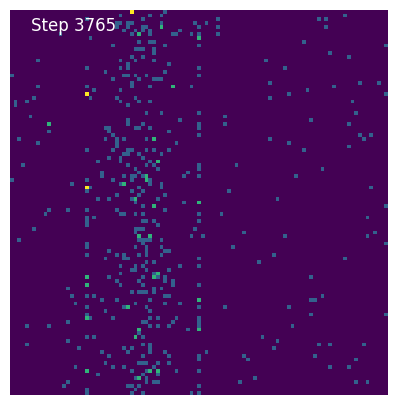

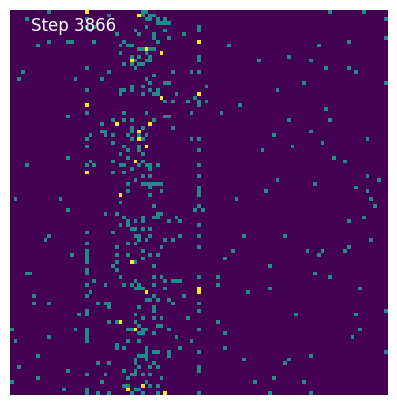

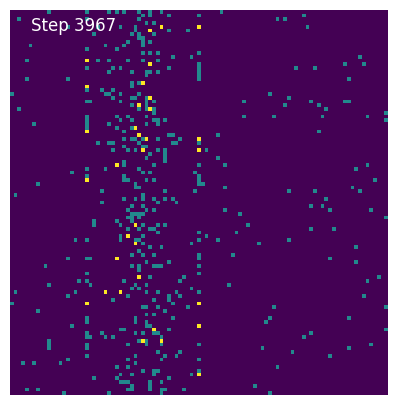

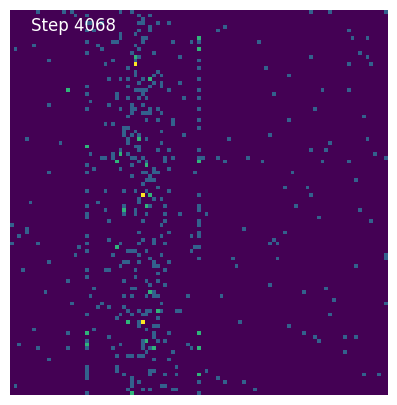

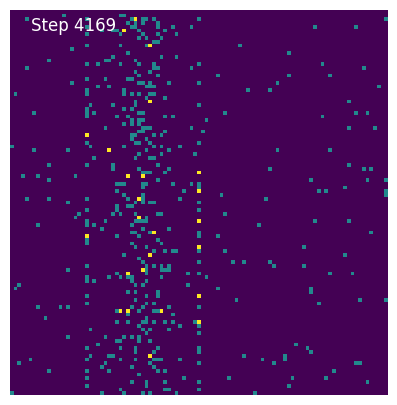

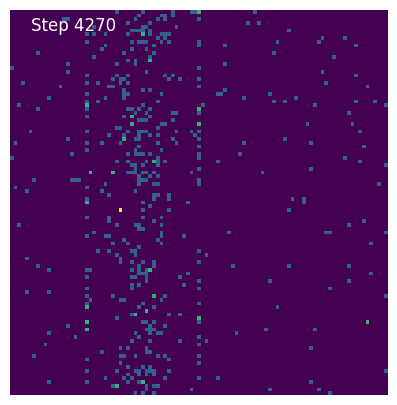

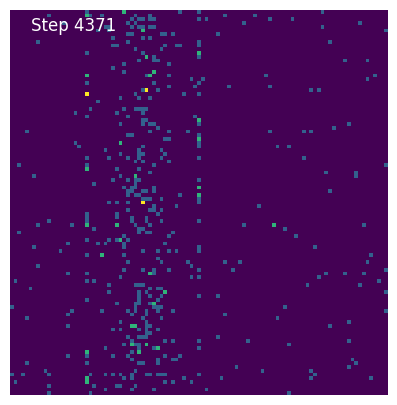

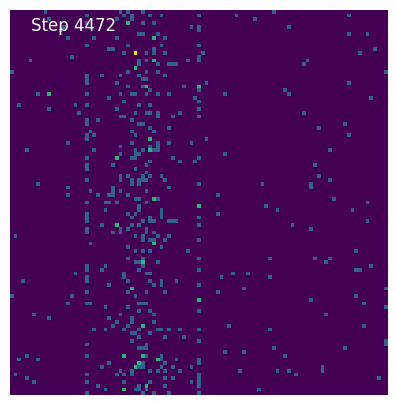

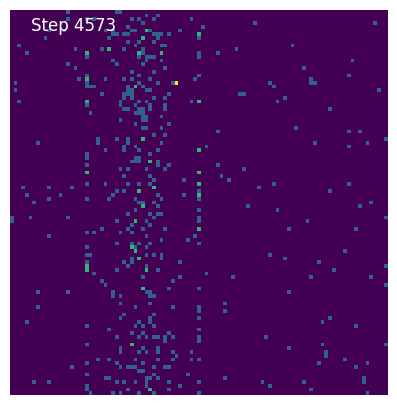

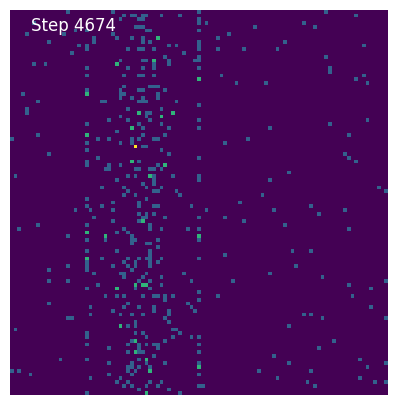

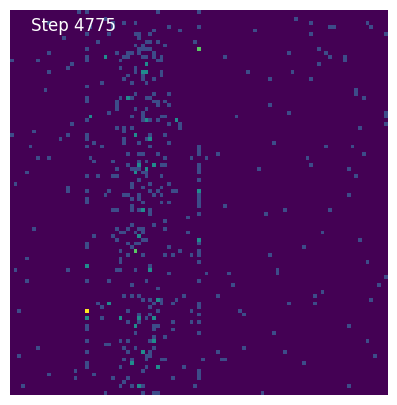

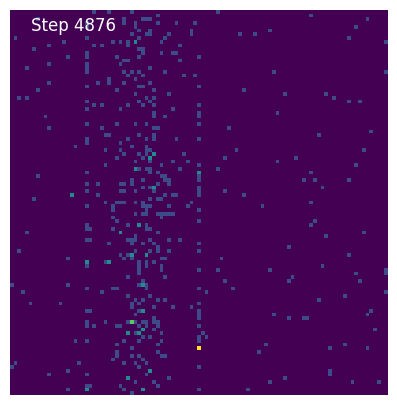

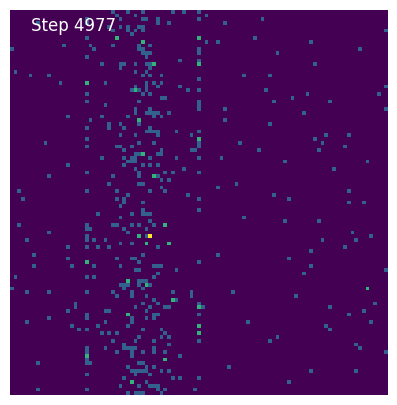

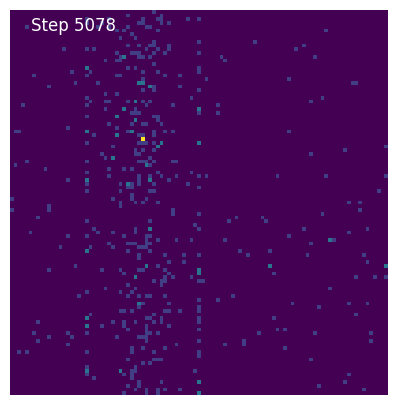

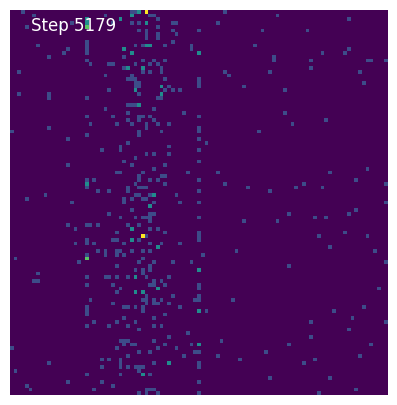

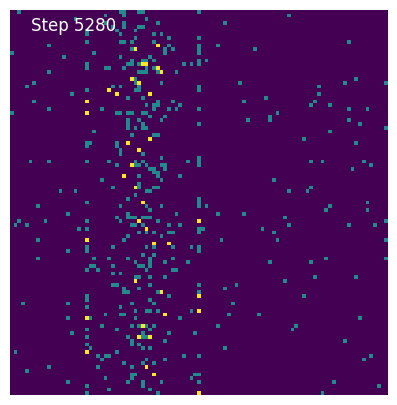

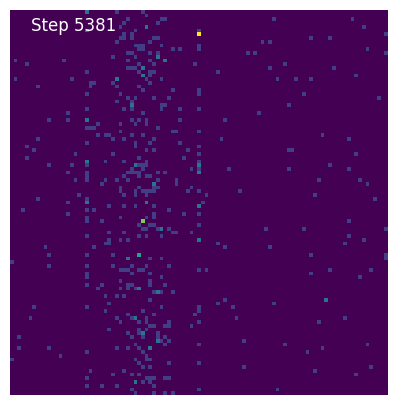

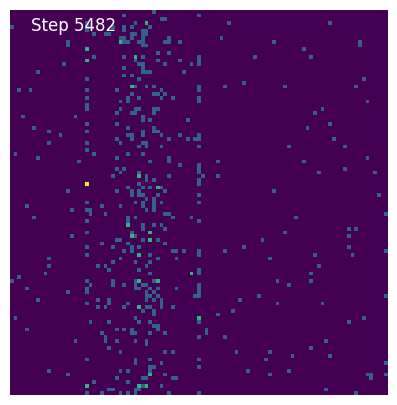

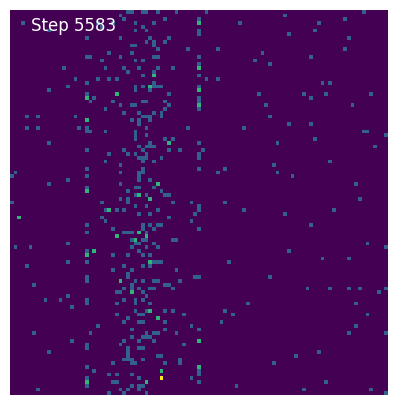

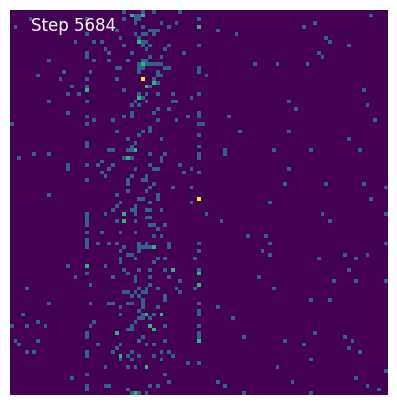

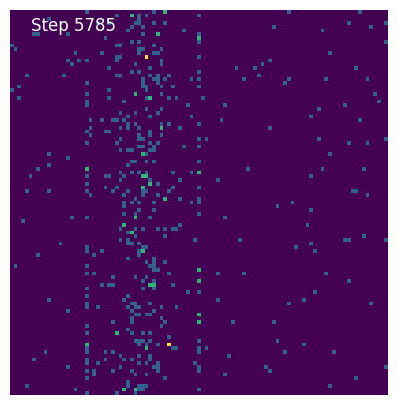

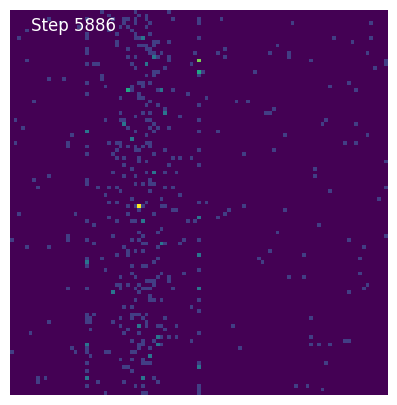

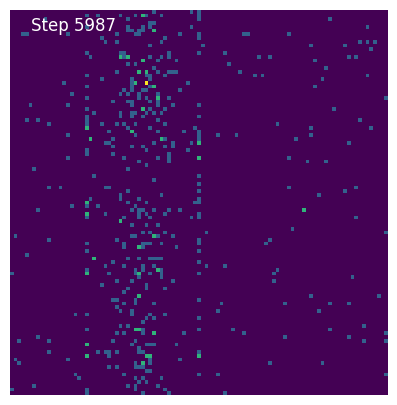

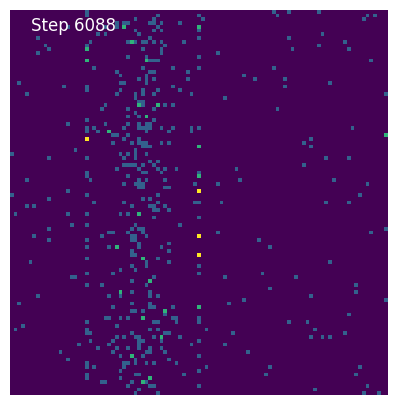

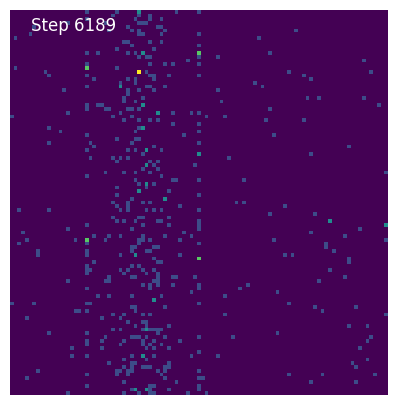

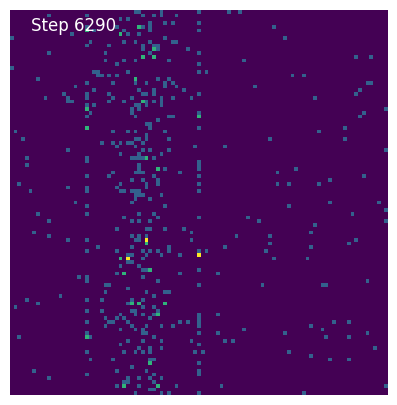

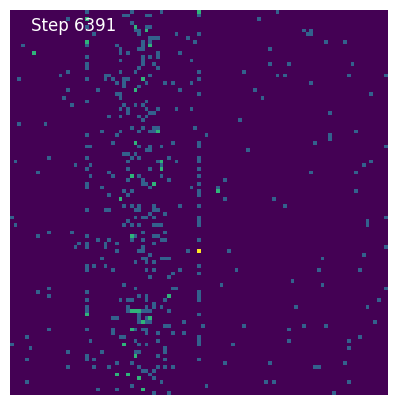

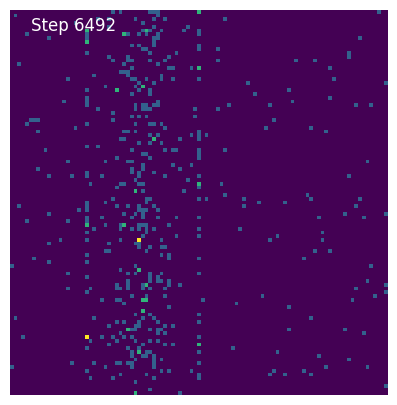

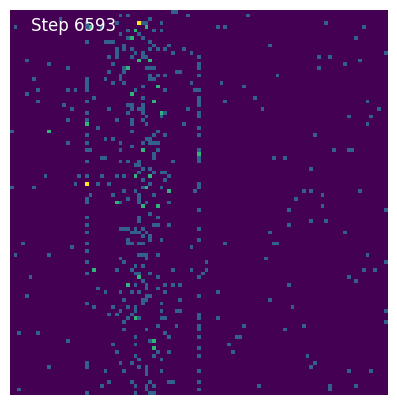

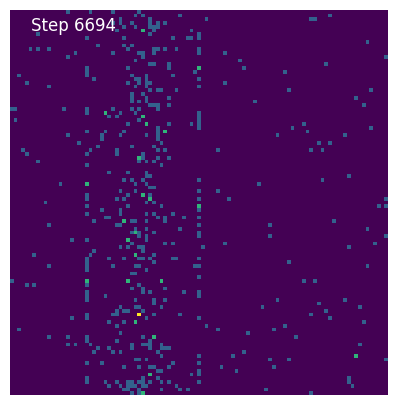

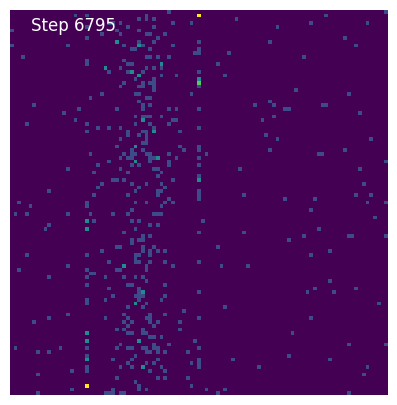

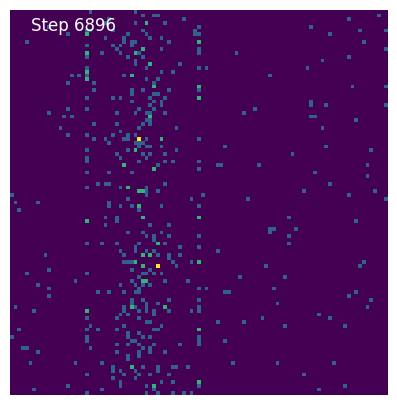

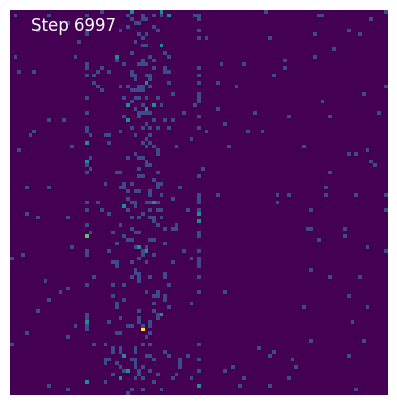

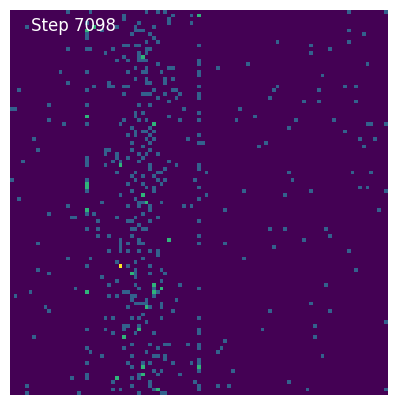

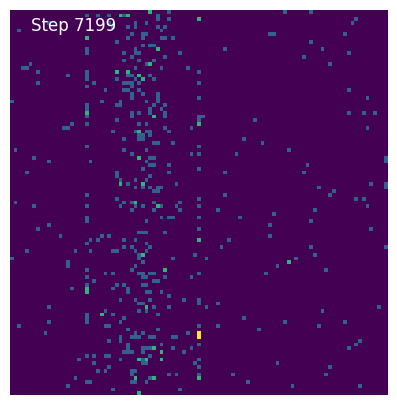

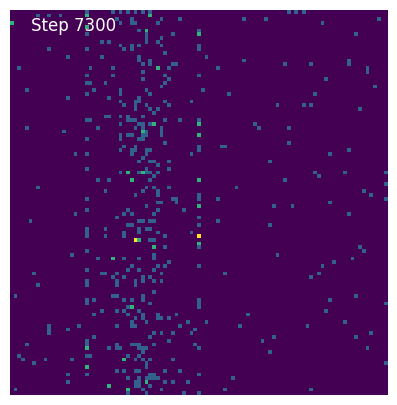

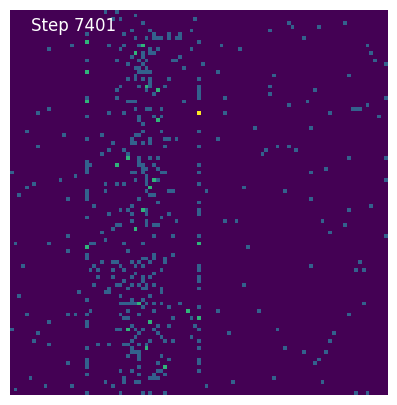

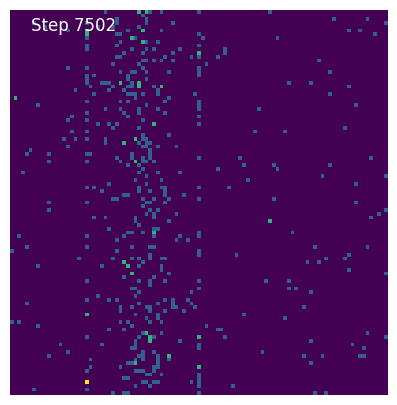

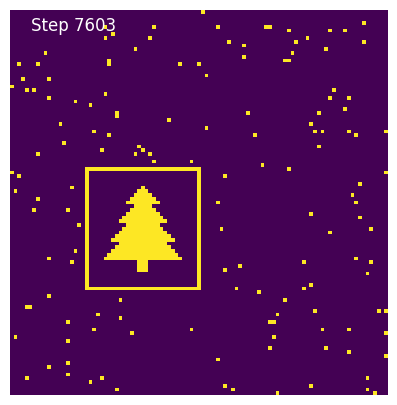

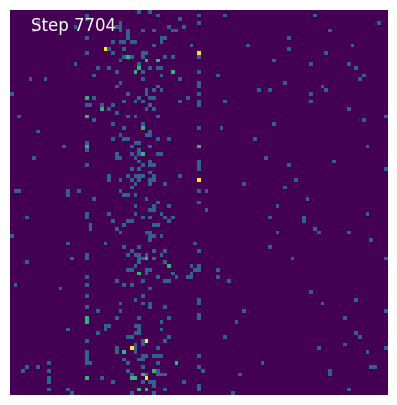

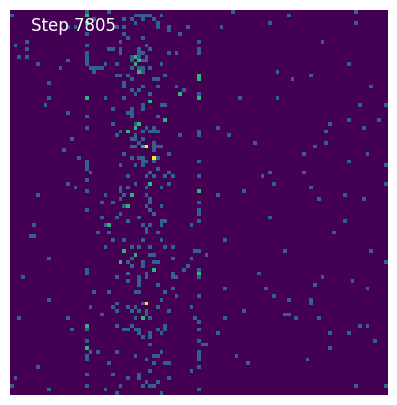

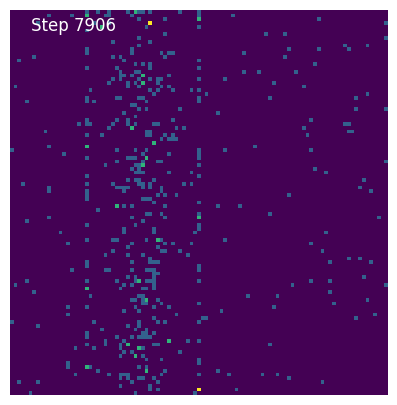

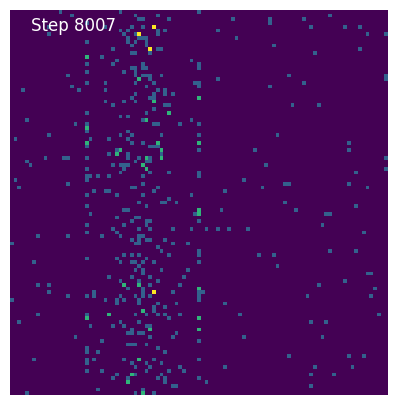

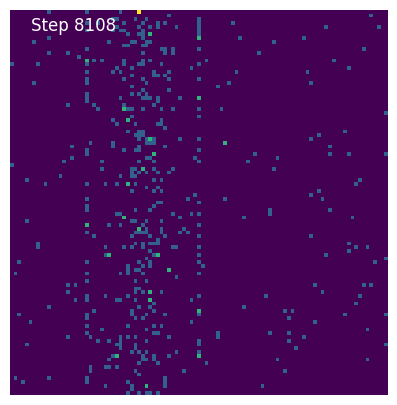

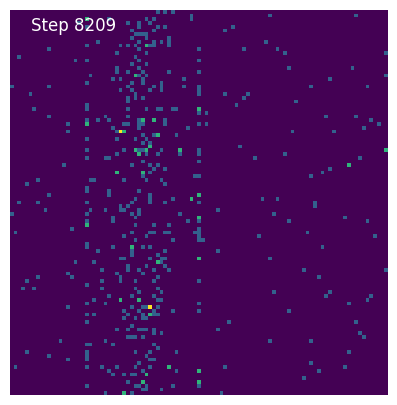

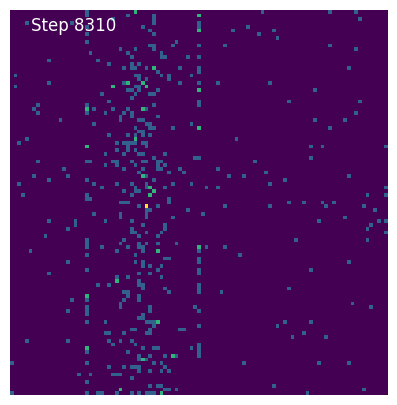

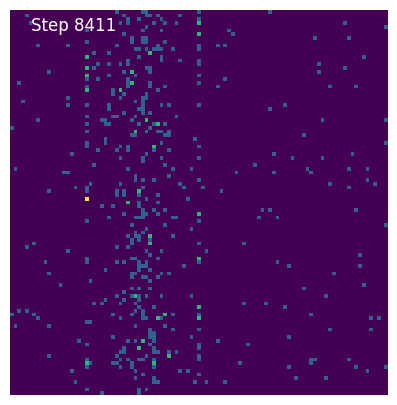

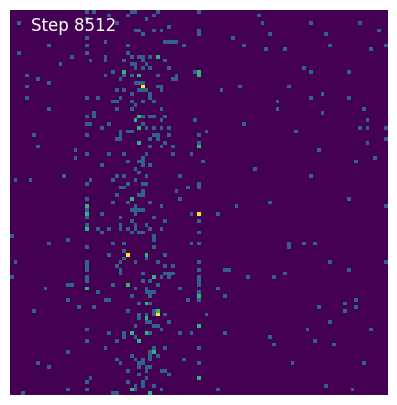

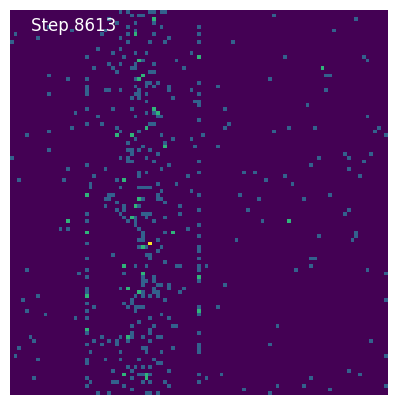

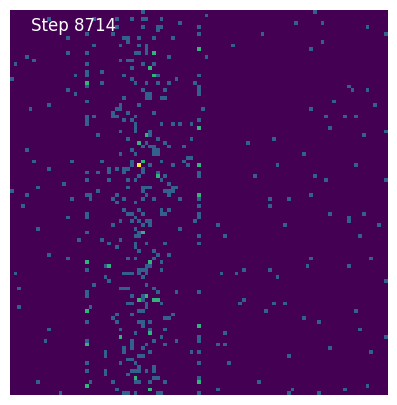

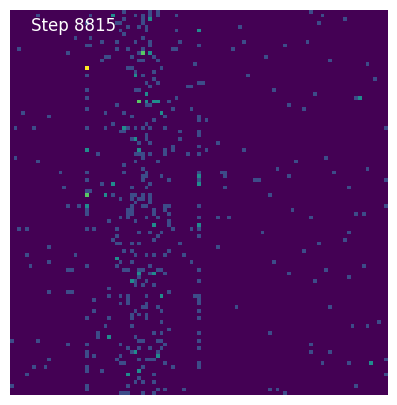

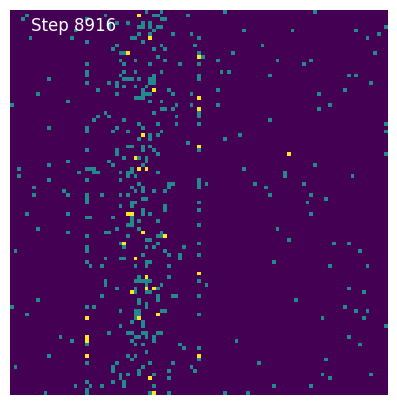

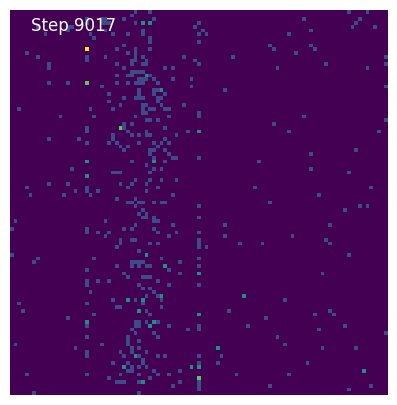

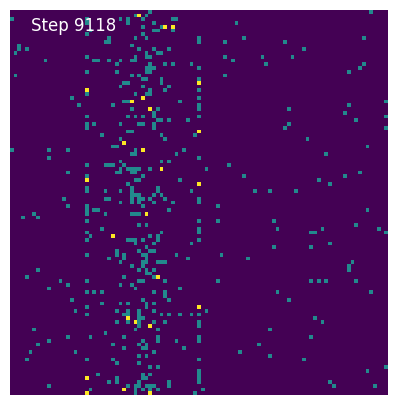

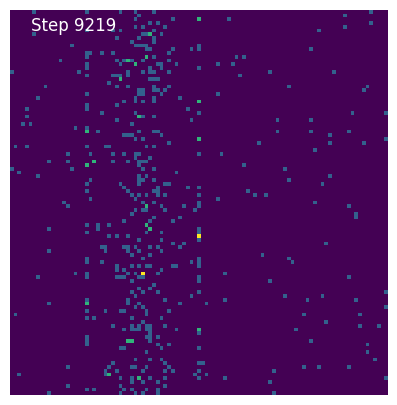

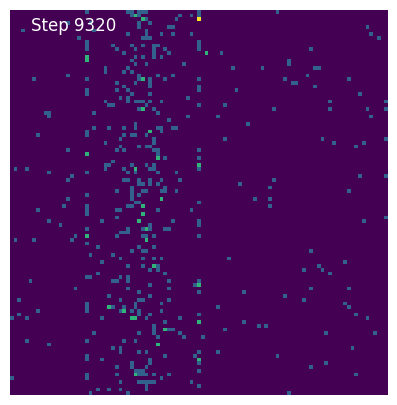

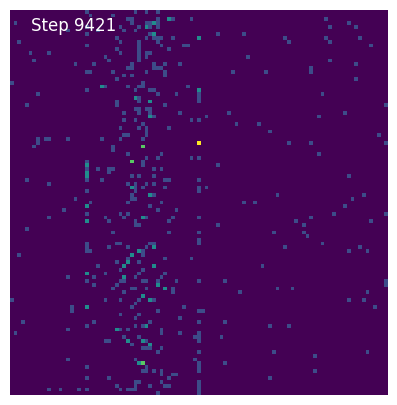

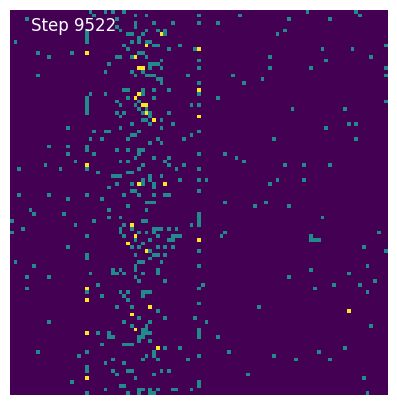

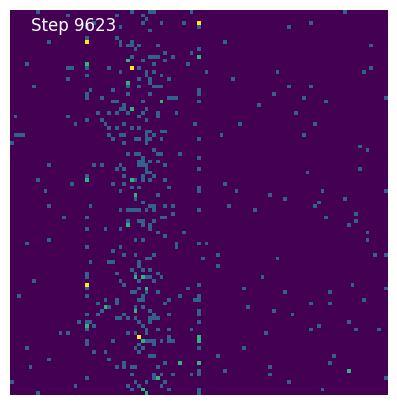

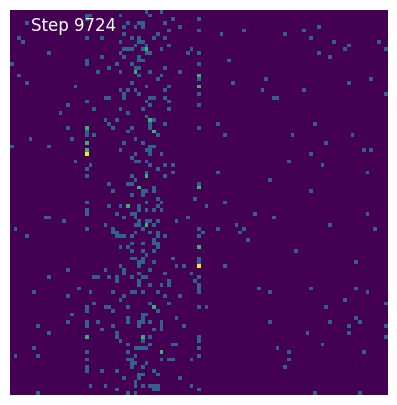

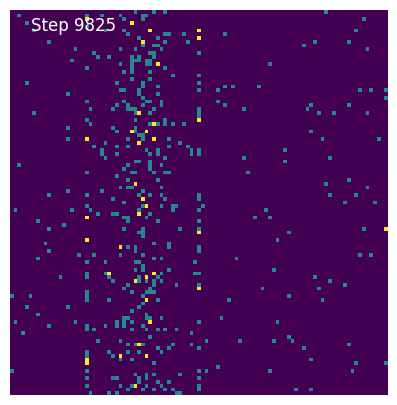

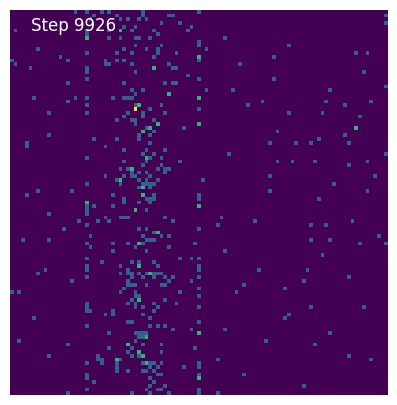

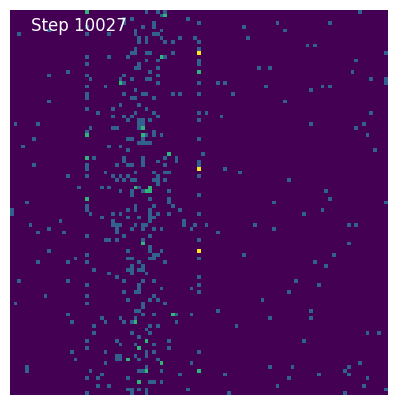

In [17]:
def is_corners_empty(grid: np.ndarray, box_size: int = 10) -> bool:
    # Check if top-left and top-right boxes are empty (all zeros)
    return (np.all(grid[:box_size, :box_size] == 0) and
            np.all(grid[:box_size, -box_size:] == 0))

def print_map_image(grid: np.ndarray, iteration: int):
    plt.figure(figsize=(5, 5))
    plt.gca().set_facecolor('white')
    plt.gca().patch.set_alpha(1)
    plt.imshow(grid, cmap='viridis', vmin=0.1, vmax=np.max(grid))
    plt.axis('off')
    plt.text(5, 5, f'Step {iteration}', color='white', fontsize=12)
    display(plt.gcf())
    plt.close()

from tqdm.notebook import tqdm
for i in tqdm(range(100)):
    i = 28+101*i
    result = simulate_bots(bots, w, h, i)
    # if is_corners_empty(result, box_size=11):
    print_map_image(result, i)